# save/load sklearn model (Model persistence)
https://scikit-learn.org/stable/modules/model_persistence.html

---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* Chulalongkorn Business School, Thailand
---

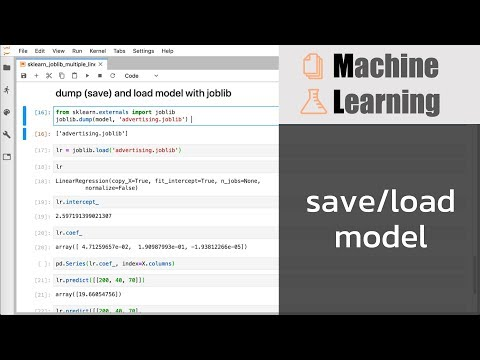

In [27]:
from IPython.display import YouTubeVideo
YouTubeVideo('X7MDGDunbFk', width=720, height=405)

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [29]:
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(pd.Timestamp.now())

pandas  version: 1.5.3
numpy   version: 1.23.5
seaborn version: 0.12.2
2023-04-04 18:25:35.768905


### An Introduction to Statistical Learning with Applications in R (ISLR)
"An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani"
- http://www-bcf.usc.edu/~gareth/ISL/index.html  
<img src="http://www-bcf.usc.edu/~gareth/ISL/ISL%20Cover%202.jpg" width="150"/>

In [30]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/ISLR/Advertising.csv'
df=pd.read_csv(url, usecols=[1, 2, 3, 4])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## sklearn: LinearRegression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [33]:
X=df[['TV', 'Radio', 'Newspaper']]
y=df['Sales']

test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=7)

In [34]:
model = LinearRegression()
model

LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
model.intercept_

2.5971913990213036

In [37]:
model.coef_

array([ 4.71259657e-02,  1.90987993e-01, -1.93812266e-05])

In [38]:
pd.Series(model.coef_, index=X.columns)

TV           0.047126
Radio        0.190988
Newspaper   -0.000019
dtype: float64

In [39]:
model.score(X_train, y_train) # R-squared

0.8970470429900155

In [40]:
model.score(X_test, y_test) # R-squared

0.8894586465158203

In [41]:
model.predict([[200, 40, 70]])

c:\Users\prasert\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.66054756])

In [42]:
model.predict([[200, 40, 70], 
               [100, 80, 50],
               [ 40, 20, 10]])

c:\Users\prasert\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.66054756, 22.58785835,  8.30179607])

## dump (save) and load model with joblib

In [43]:
# from sklearn.externals import joblib
import joblib
joblib.dump(model, 'advertising.joblib') 

['advertising.joblib']

In [44]:
lr = joblib.load('advertising.joblib')

In [45]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [46]:
lr.intercept_

2.5971913990213036

In [47]:
lr.coef_

array([ 4.71259657e-02,  1.90987993e-01, -1.93812266e-05])

In [48]:
pd.Series(lr.coef_, index=X.columns)

TV           0.047126
Radio        0.190988
Newspaper   -0.000019
dtype: float64

In [49]:
lr.predict([[200, 40, 70]])

c:\Users\prasert\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.66054756])

In [50]:
lr.predict([[200, 40, 70], 
            [100, 80, 50],
            [ 40, 20, 10]])

c:\Users\prasert\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.66054756, 22.58785835,  8.30179607])